In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from google.colab import files

In [5]:
# Uploading csv
uploaded = files.upload()

Saving final_data.csv.zip to final_data.csv (1).zip


In [6]:
# Unzipping  uploaded file
with zipfile.ZipFile("final_data.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

# Checking file names
print(os.listdir())

['.config', 'final_data.csv (1).zip', 'final_data.csv', '__MACOSX', 'final_data.csv.zip', 'sample_data']


In [7]:
# Creating dataframe
df = pd.read_csv("final_data.csv")
df.head()

,won_county,candidate,party_simplified,mode,state_name,nyt headline mentions,nyt lead paragraph mentions,fox headline mentions,estimate total population,estimate total population male,...,percent hispanic or latino and total population not hispanic or latino native hawaiian and other pacific islander alone,percent hispanic or latino and total population not hispanic or latino some other race alone,percent hispanic or latino and total population not hispanic or latino two or more races,percent hispanic or latino and total population not hispanic or latino two or more races two races including some other race,"percent hispanic or latino and total population not hispanic or latino two or more races two races excluding some other race, and three or more races",percent total housing units,"percent citizen, voting age population citizen, 18 and over population","percent citizen, voting age population citizen, 18 and over population male","percent citizen, voting age population citizen, 18 and over population female",county
0,0,writein,unaffiliated,total,texas,0.0,0.0,0.0,57917.0,35438.0,...,0.0,0.1,2.6,0.5,2.1,(x),44815.0,62.9,37.1,anderson county
1,0,joseph r biden,democrat,total,texas,1278.0,2177.0,1295.0,57917.0,35438.0,...,0.0,0.1,2.6,0.5,2.1,(x),44815.0,62.9,37.1,anderson county
2,0,jo jorgensen,libertarian,total,texas,0.0,0.0,2.0,57917.0,35438.0,...,0.0,0.1,2.6,0.5,2.1,(x),44815.0,62.9,37.1,anderson county
3,0,howie hawkins,green party,total,texas,2.0,4.0,0.0,57917.0,35438.0,...,0.0,0.1,2.6,0.5,2.1,(x),44815.0,62.9,37.1,anderson county
4,1,donald j trump,republican,total,texas,3801.0,4775.0,2622.0,57917.0,35438.0,...,0.0,0.1,2.6,0.5,2.1,(x),44815.0,62.9,37.1,anderson county


In [8]:
# EXPLORATORY DATA ANALYSIS

# Initial Descriptive EDA
# Basic structure
print(df.shape)
print(df.columns)
df.info()
df.describe(include='all')

missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

(884751, 177)
Index(['won_county', 'candidate', 'party_simplified', 'mode', 'state_name',
       'nyt headline mentions', 'nyt lead paragraph mentions',
       'fox headline mentions', 'estimate total population',
       'estimate total population male',
       ...
       'percent hispanic or latino and total population not hispanic or latino native hawaiian and other pacific islander alone',
       'percent hispanic or latino and total population not hispanic or latino some other race alone',
       'percent hispanic or latino and total population not hispanic or latino two or more races',
       'percent hispanic or latino and total population not hispanic or latino two or more races two races including some other race',
       'percent hispanic or latino and total population not hispanic or latino two or more races two races excluding some other race, and three or more races',
       'percent total housing units',
       'percent citizen, voting age population citizen, 18 and over p

,0


In [9]:
# Missing values check
missing = df.isnull().sum()
missing[missing > 0]

,0


<ipython-input-10-db44f7edee93>:18: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


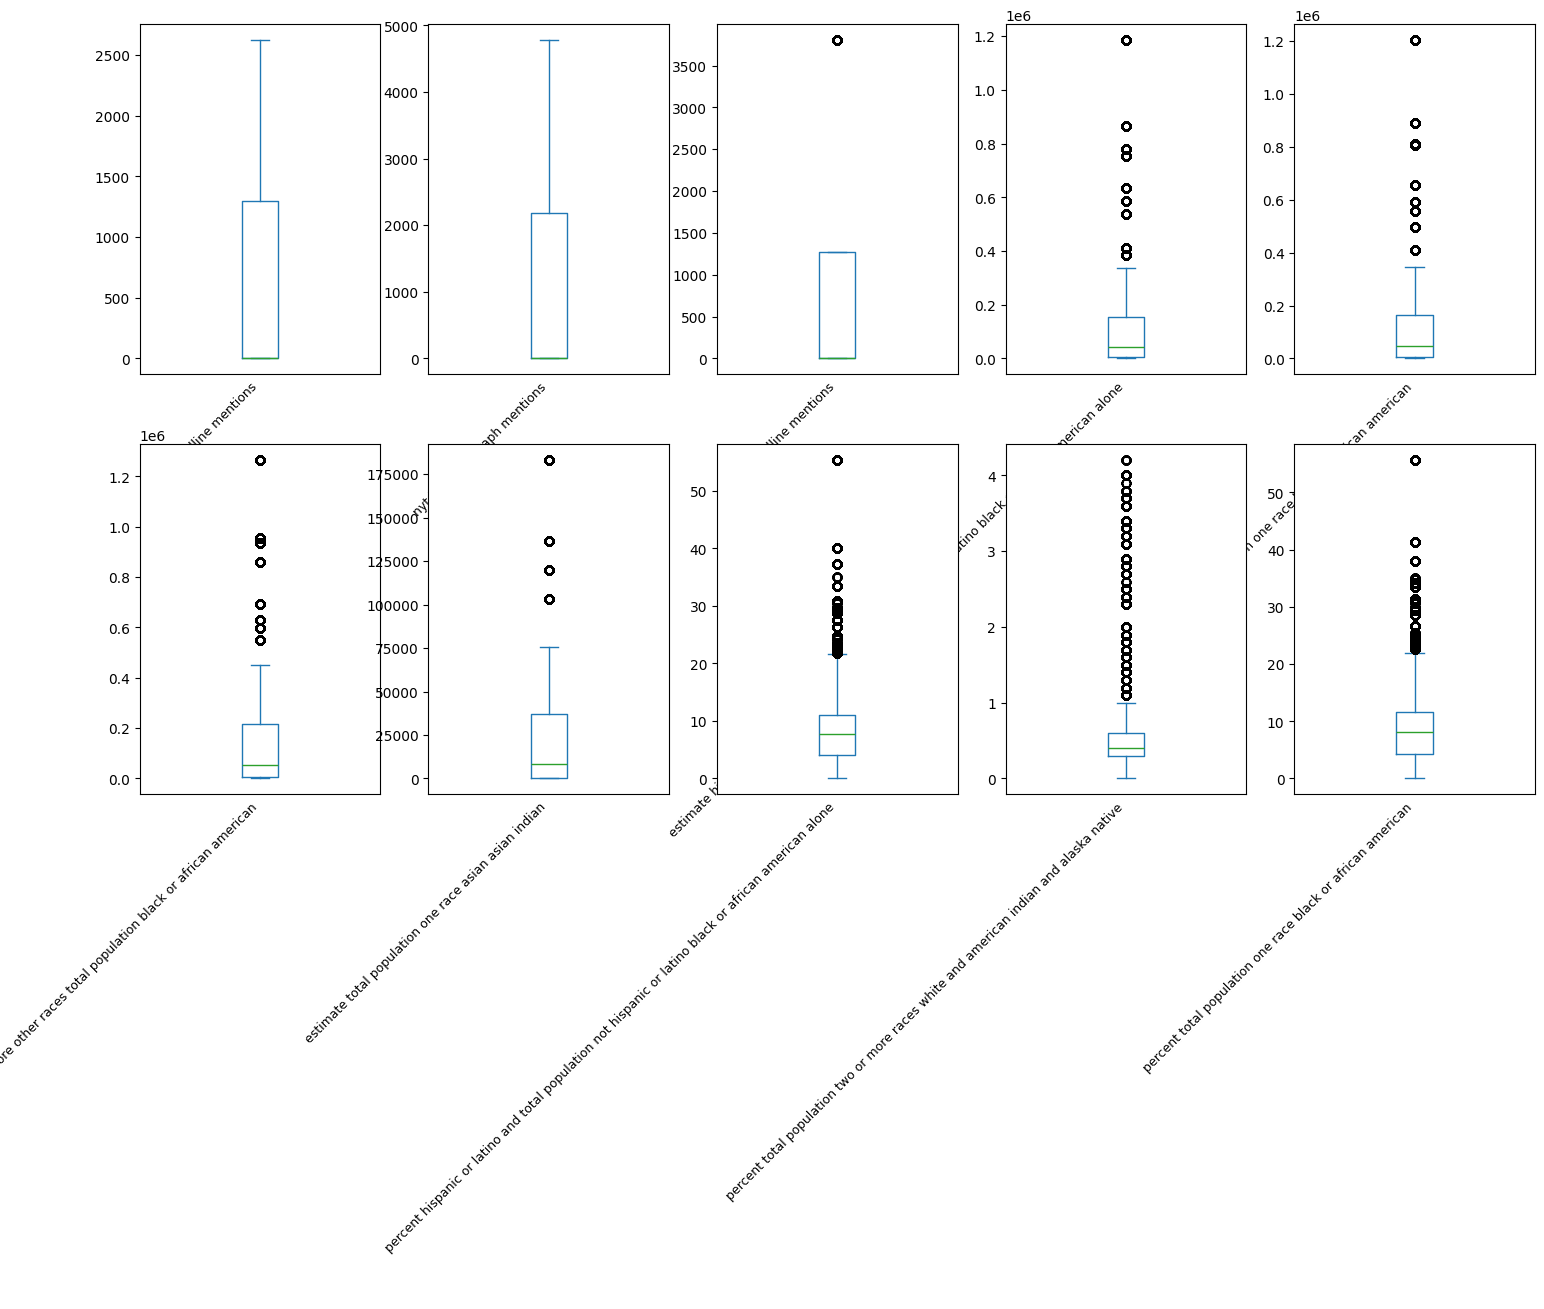

In [10]:
# Outliers Check

# Creating individual boxplots for each feature
sampled_df = df.sample(n=5000, random_state=42)
numeric_df_sampled = sampled_df.select_dtypes(include='number')
correlations = numeric_df_sampled.corr()['won_county'].abs().sort_values(ascending=False)
top_features = correlations.index[1:11]

axes = df[top_features].plot(
    kind='box',
    subplots=True,
    layout=(2, 5),
    figsize=(18, 10),
    sharex=False,
    sharey=False
)

plt.tight_layout()
for ax, feature in zip(np.ravel(axes), top_features):
    ax.set_xlabel(feature)
    ax.set_xticks([])
    ax.set_title('')
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.label.set_rotation(45)
    ax.xaxis.label.set_horizontalalignment('right')
    ax.xaxis.label.set_fontsize(9)

plt.show()

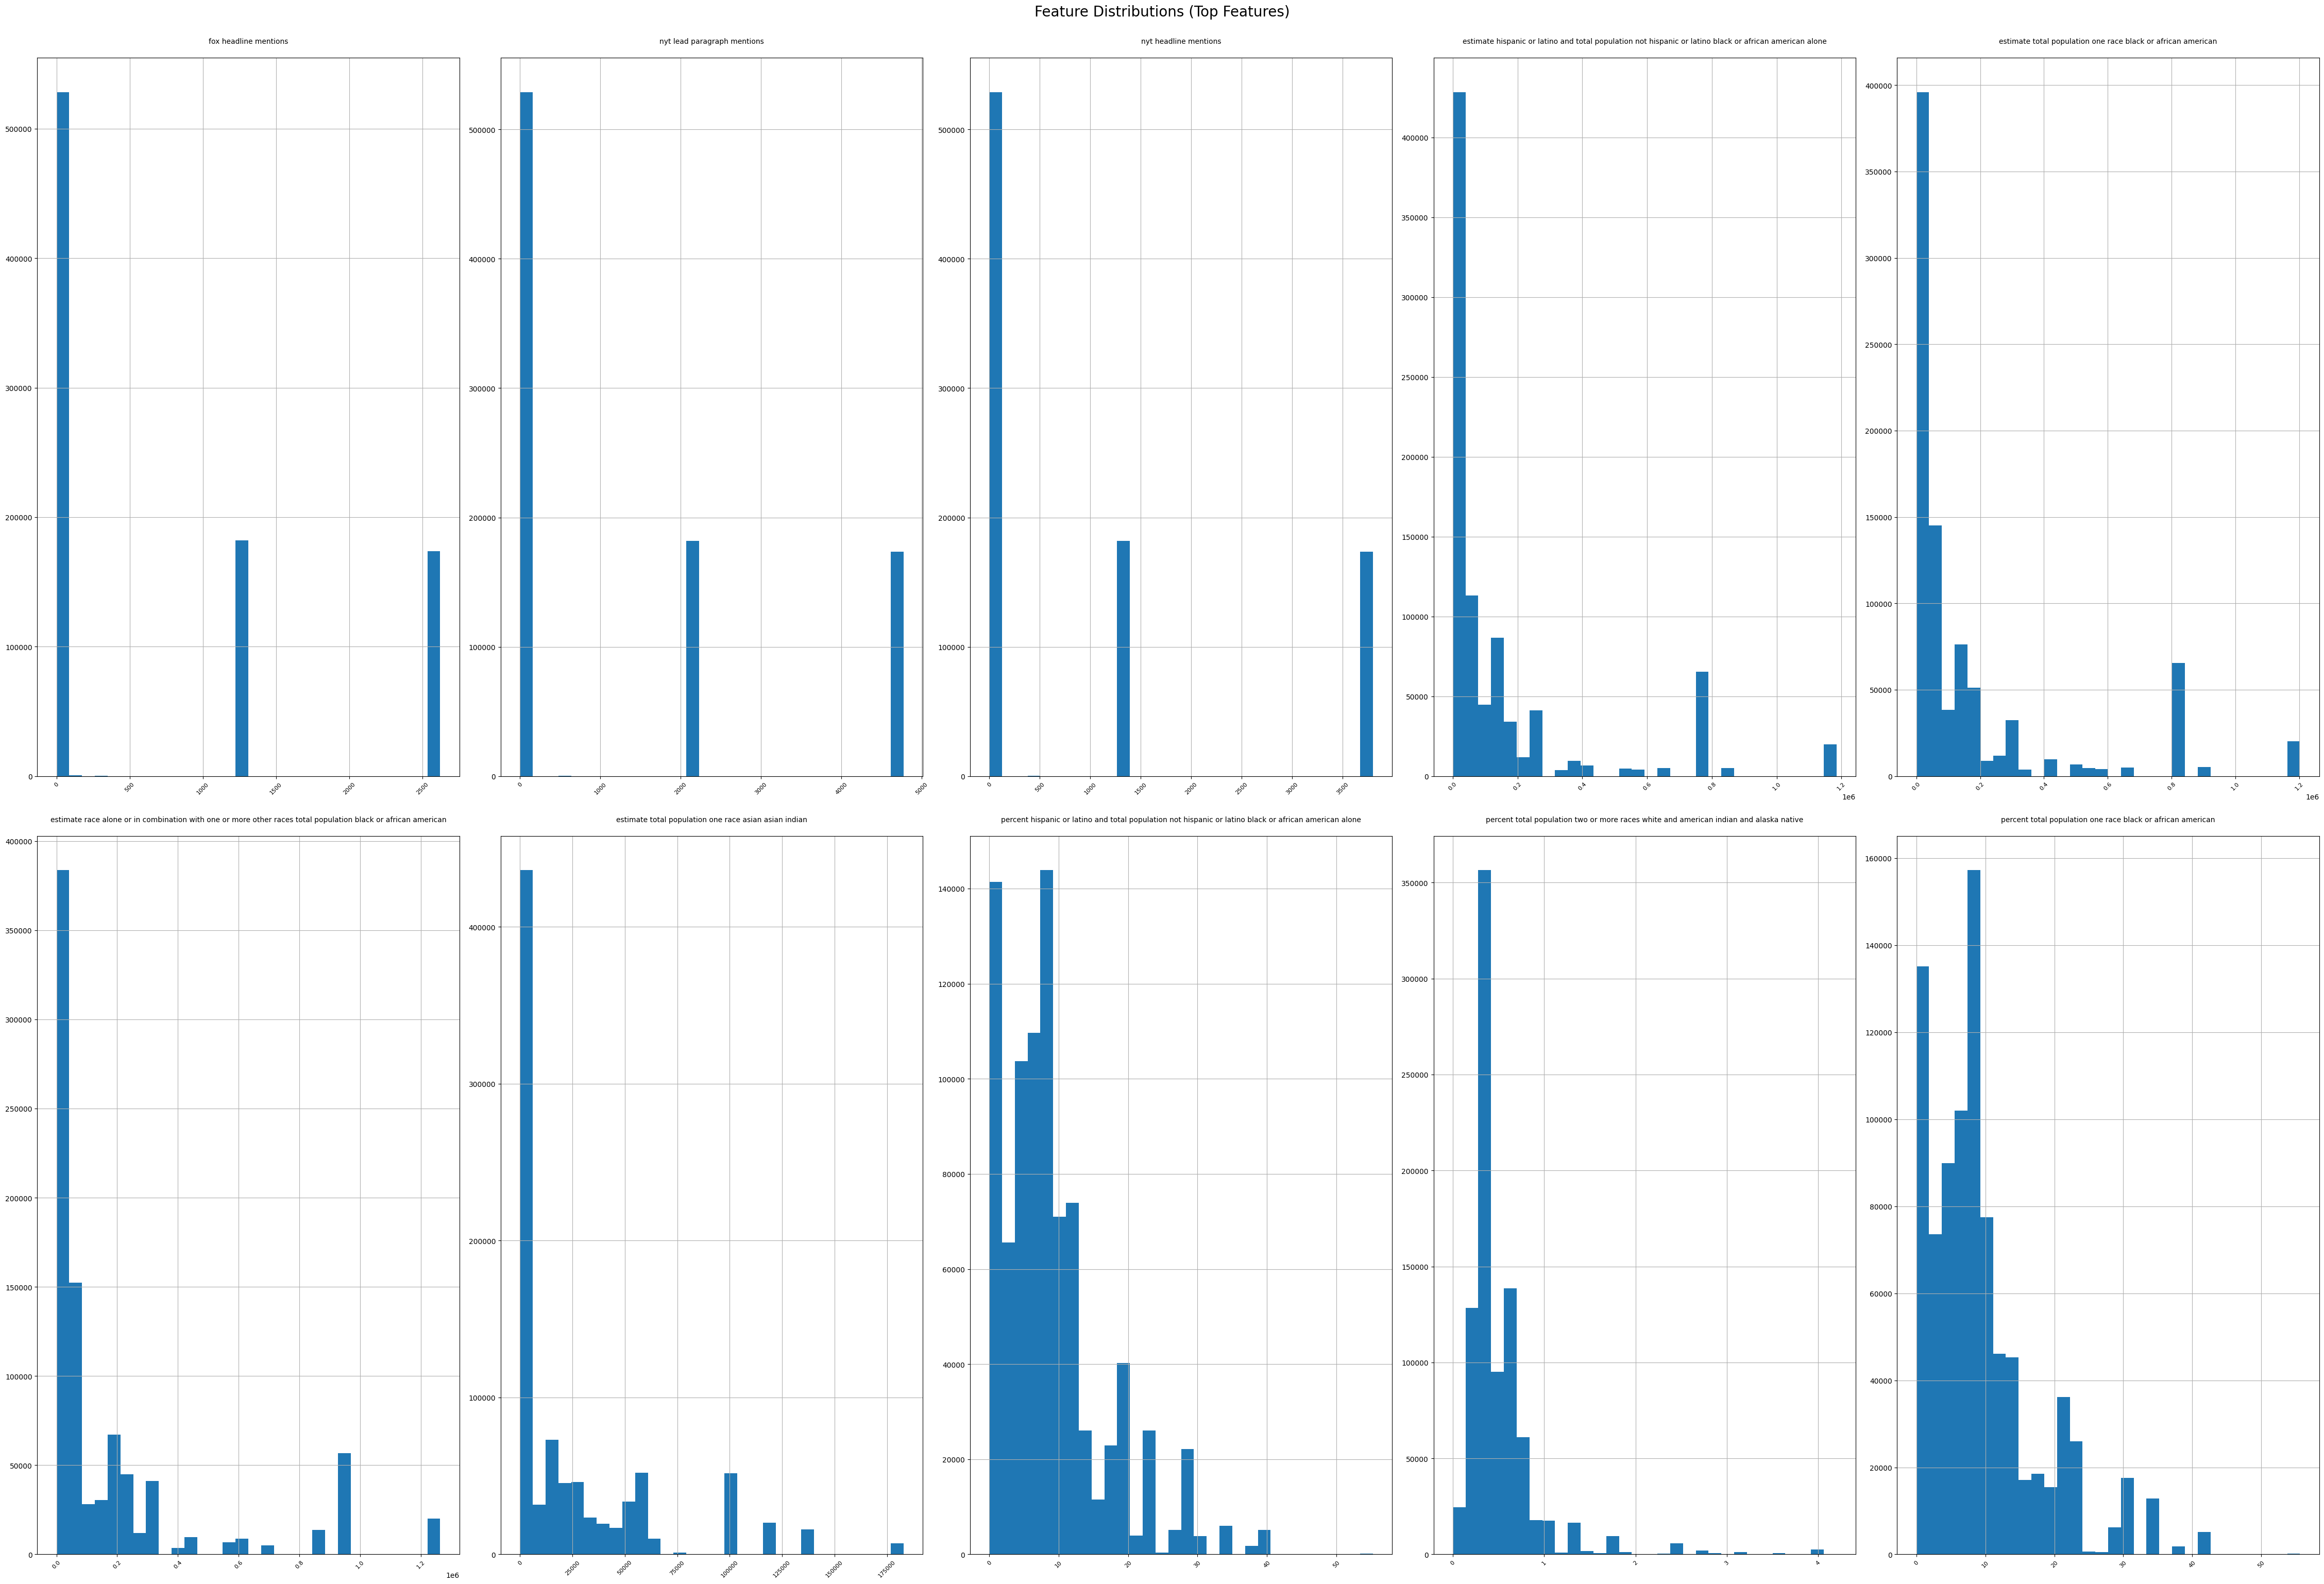

In [11]:
# Feature distributions for the top numeric features

fig, axes = plt.subplots(
    nrows=2,
    ncols=5,
    figsize=(45, 30),
    constrained_layout=True
)

axes = axes.flatten()

for i, feature in enumerate(top_features):
    df[feature].hist(bins=30, ax=axes[i])
    axes[i].set_title(feature, fontsize=10, pad=20)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)

for j in range(len(top_features), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Feature Distributions (Top Features)', fontsize=20, y=1.02)
plt.show()

In [12]:
# Descriptive Statistics
df.describe()

,won_county,nyt headline mentions,nyt lead paragraph mentions,fox headline mentions,estimate total population,estimate total population male,estimate total population female,estimate total population sex ratio (males per 100 females),estimate total population under 5 years,estimate total population 5 to 9 years,...,percent hispanic or latino and total population not hispanic or latino american indian and alaska native alone,percent hispanic or latino and total population not hispanic or latino asian alone,percent hispanic or latino and total population not hispanic or latino native hawaiian and other pacific islander alone,percent hispanic or latino and total population not hispanic or latino some other race alone,percent hispanic or latino and total population not hispanic or latino two or more races,percent hispanic or latino and total population not hispanic or latino two or more races two races including some other race,"percent hispanic or latino and total population not hispanic or latino two or more races two races excluding some other race, and three or more races","percent citizen, voting age population citizen, 18 and over population","percent citizen, voting age population citizen, 18 and over population male","percent citizen, voting age population citizen, 18 and over population female"
count,884751.000000,884751.000000,884751.000000,884751.000000,8.847510e+05,8.847510e+05,8.847510e+05,884751.000000,884751.000000,884751.000000,...,884751.000000,884751.000000,884751.000000,884751.000000,884751.000000,884751.000000,884751.000000,8.847510e+05,884751.000000,884751.000000
mean,0.490323,1009.274091,1385.719115,781.463356,1.528090e+06,7.518881e+05,7.762019e+05,98.850670,92722.334817,91505.514540,...,0.294136,6.917550,0.116222,0.335257,2.513176,0.277530,2.233471,1.008264e+06,49.022777,50.977223
std,0.499907,1467.254555,1878.741833,1040.967335,2.405700e+06,1.184908e+06,1.220917e+06,7.200383,144098.436420,140973.438348,...,0.524597,7.382098,0.199739,0.263880,0.977616,0.191598,0.939260,1.533622e+06,2.051941,2.051941
min,0.000000,0.000000,0.000000,0.000000,1.170000e+02,8.300000e+01,3.400000e+01,81.400000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.100000e+01,40.500000,19.800000
25%,0.000000,0.000000,0.000000,0.000000,8.711000e+04,4.310700e+04,4.400300e+04,95.700000,5661.000000,5769.000000,...,0.100000,1.200000,0.000000,0.200000,1.900000,0.200000,1.500000,6.762200e+04,48.100000,50.600000
50%,0.000000,2.000000,4.000000,2.000000,6.996820e+05,3.458120e+05,3.501680e+05,97.400000,39195.000000,40825.000000,...,0.200000,4.100000,0.000000,0.300000,2.400000,0.200000,2.100000,4.726880e+05,48.600000,51.400000
75%,1.000000,1278.000000,2177.000000,1295.000000,1.629153e+06,7.716170e+05,8.444430e+05,99.400000,102679.000000,95779.000000,...,0.300000,10.200000,0.200000,0.400000,2.900000,0.300000,2.700000,1.140501e+06,49.400000,51.900000
max,1.000000,3801.000000,4775.000000,2622.000000,1.004068e+07,4.949565e+06,5.091117e+06,244.100000,593061.000000,583789.000000,...,28.700000,37.400000,1.500000,3.200000,7.800000,2.400000,7.600000,6.367652e+06,80.200000,59.500000


In [13]:
# Numeric features only
numeric_df = df.select_dtypes(include='number')

# Group by won_county and take means
grouped_means = numeric_df.groupby(df['won_county']).mean()
print(grouped_means)

            won_county  nyt headline mentions  nyt lead paragraph mentions  \
won_county                                                                   
0                  0.0              616.29256                   833.012873   
1                  1.0             1417.76693                  1960.241133   

            fox headline mentions  estimate total population  \
won_county                                                     
0                      467.552918               1.249104e+06   
1                     1107.764102               1.818088e+06   

            estimate total population male  estimate total population female  \
won_county                                                                     
0                            617067.343837                     632037.036085   
1                            892030.372591                     926057.165262   

            estimate total population sex ratio (males per 100 females)  \
won_county                        

<Axes: title={'center': 'Distribution of Target (won_county)'}, xlabel='won_county'>

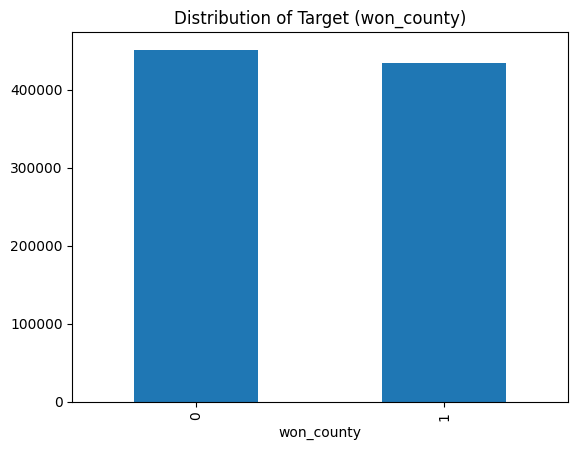

In [14]:
# Distribution of target variable
df['won_county'].value_counts().plot(kind='bar', title='Distribution of Target (won_county)')

Text(0.5, 1.0, 'Correlation Heatmap')

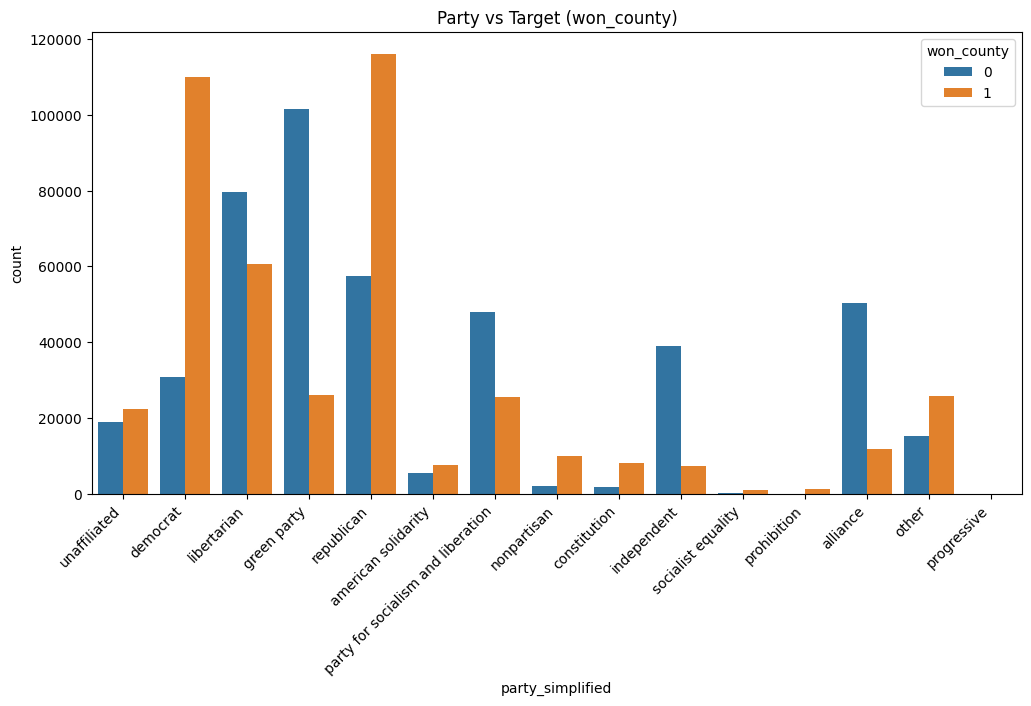

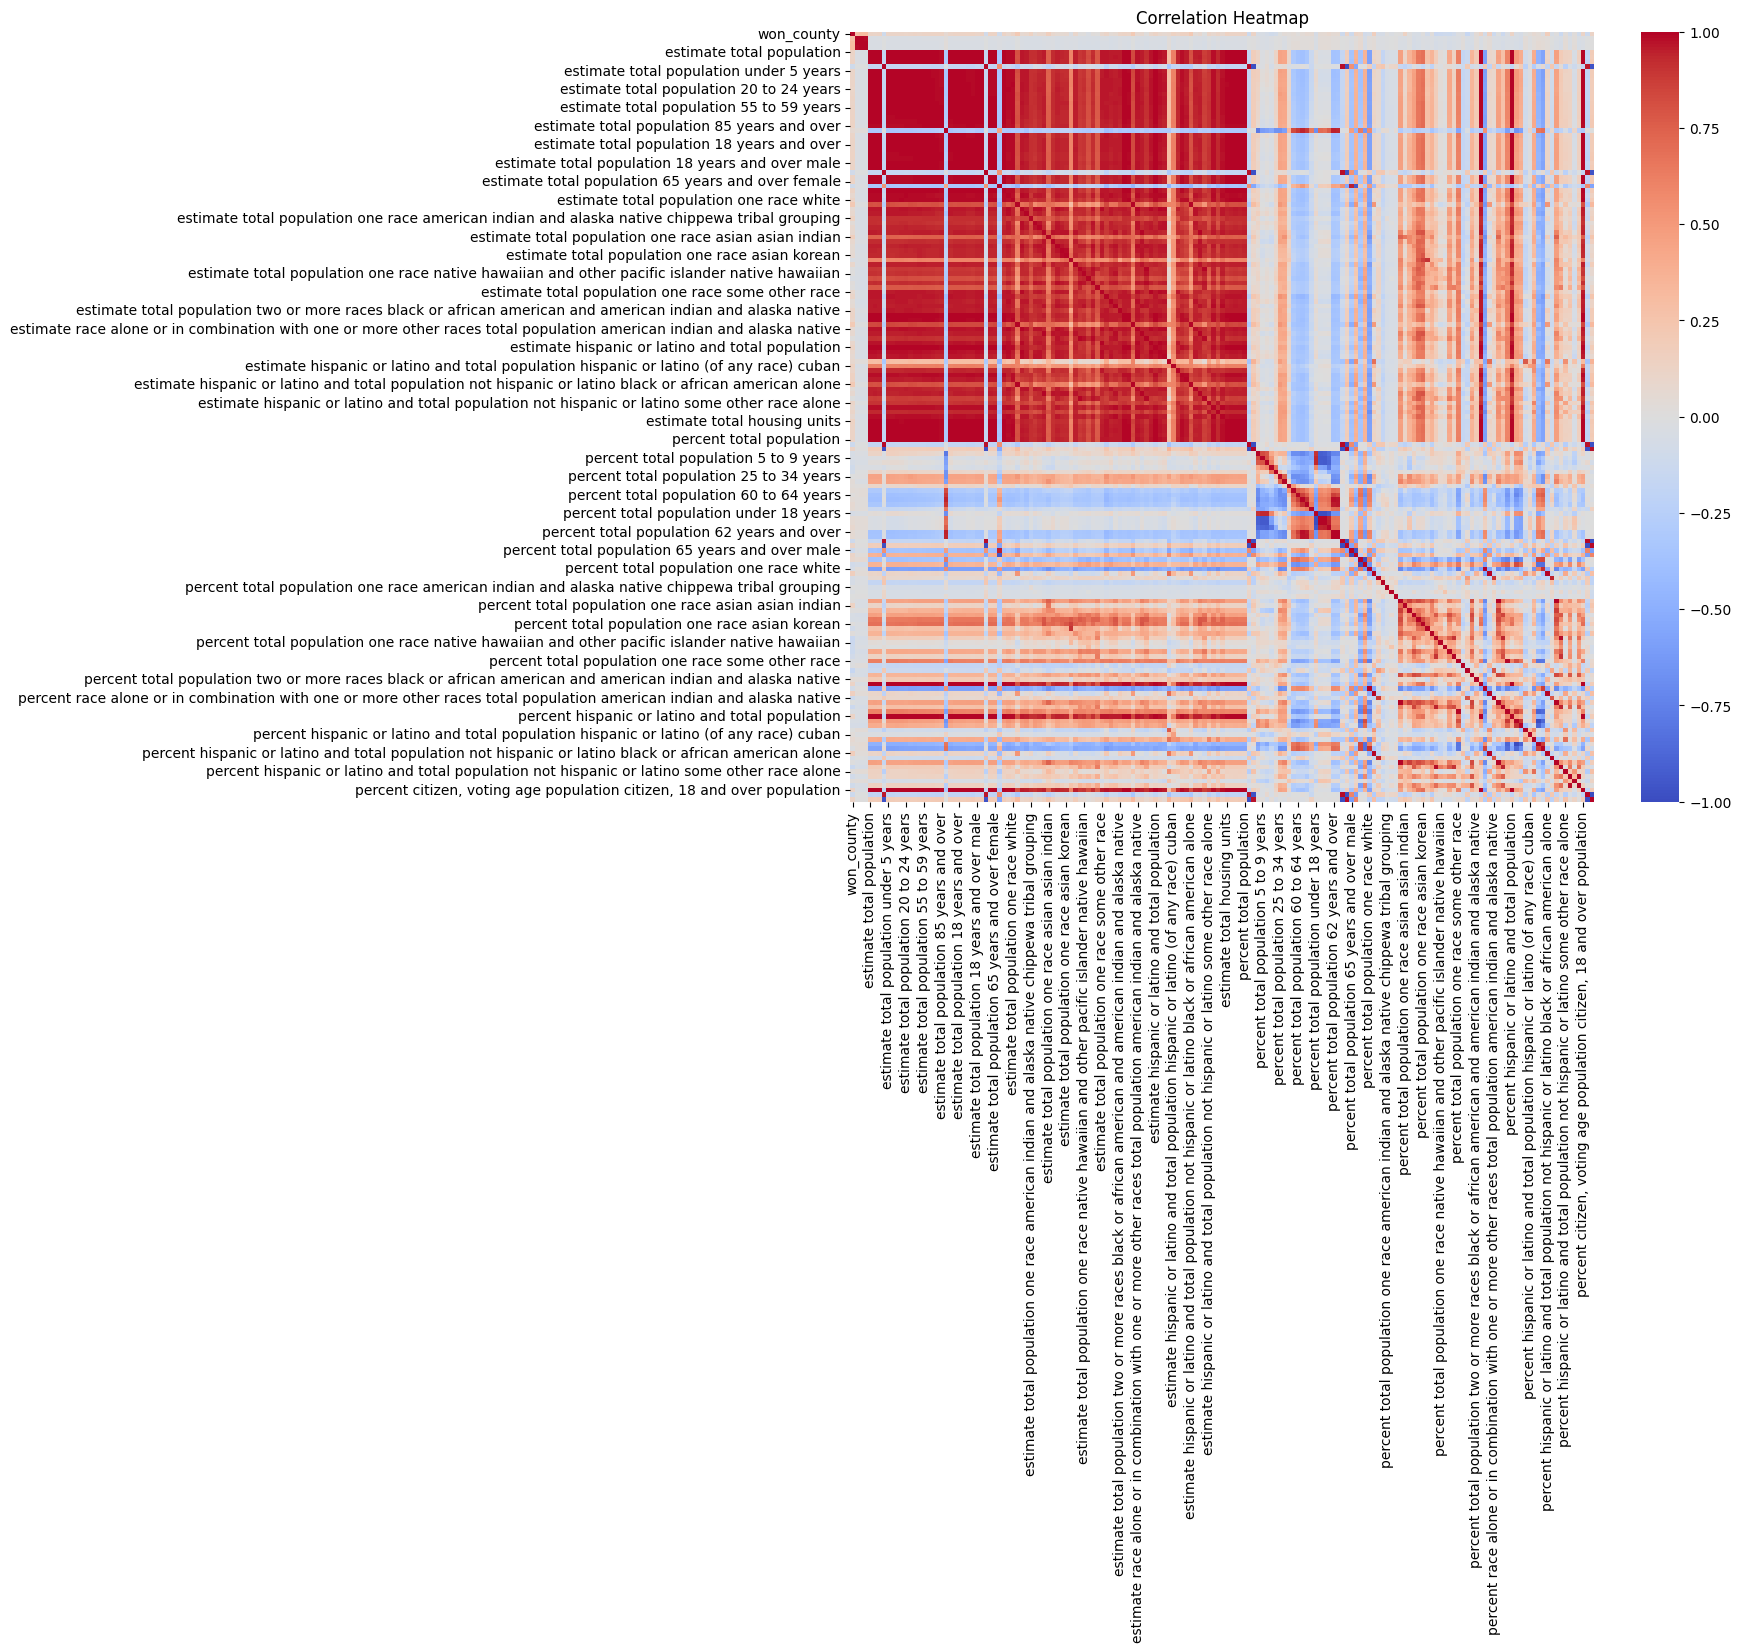

In [15]:
# Exploring categorical variables vs target variable
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='party_simplified', hue='won_county')
plt.title('Party vs Target (won_county)')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Correlation heatmap for numerical features
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'PCA of Numeric Features Colored by won_county')

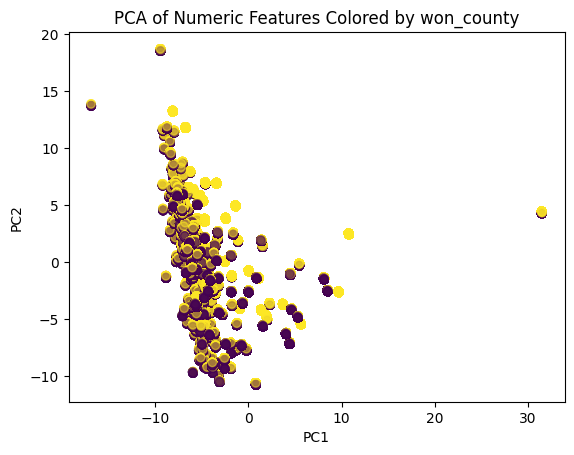

In [16]:
# UNSUPERVISED LEARNING

# PCA
# Normalizing numeric features
X_scaled = StandardScaler().fit_transform(numeric_df)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot for PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['won_county'], cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Numeric Features Colored by won_county')

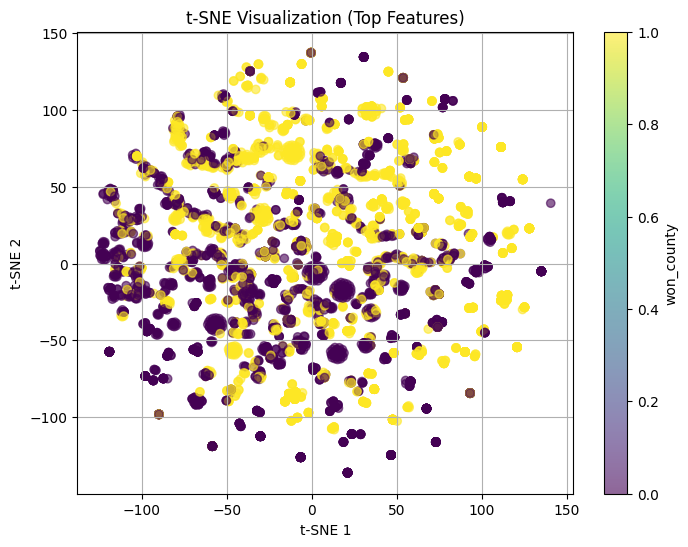

In [17]:
# t-SNE
numeric_df = df.select_dtypes(include='number')
correlations = numeric_df.corr()['won_county'].abs().sort_values(ascending=False)
top_features = correlations.index[1:11]
X_top = df[top_features]
scaler = StandardScaler()
X_top_scaled = scaler.fit_transform(X_top)

sample_size = 5000
if X_top_scaled.shape[0] > sample_size:
    sample_idx = np.random.choice(X_top_scaled.shape[0], size=sample_size, replace=False)
    X_sample = X_top_scaled[sample_idx]
    y_sample = df['won_county'].iloc[sample_idx]
else:
    X_sample = X_top_scaled
    y_sample = df['won_county']

tsne = TSNE(n_components=2, perplexity=20, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_sample, cmap='viridis', alpha=0.6)
plt.title('t-SNE Visualization (Top Features)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='won_county')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


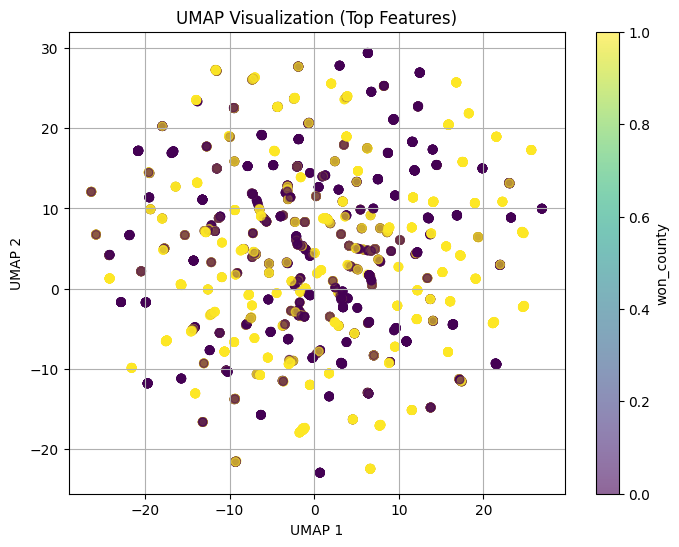

In [18]:
# UMAP
reducer = umap.UMAP(n_neighbors=10, random_state=42)
X_umap = reducer.fit_transform(X_sample)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_sample, cmap='viridis', alpha=0.6)
plt.title('UMAP Visualization (Top Features)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='won_county')
plt.grid(True)
plt.show()

Silhouette Score for KMeans: 0.483


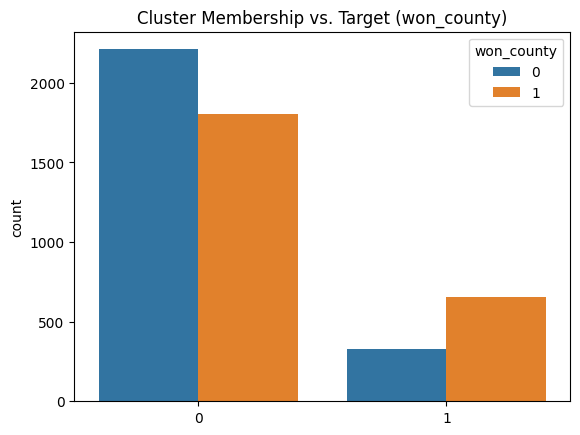

In [20]:
# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(X_sample)

# Silhouette Score
score = silhouette_score(X_sample, clusters)
print(f"Silhouette Score for KMeans: {score:.3f}")

# Plot (clusters vs true target)
pd.crosstab(clusters, y_sample)
sns.countplot(x=clusters, hue=y_sample)
plt.title('Cluster Membership vs. Target (won_county)')
plt.show()

Silhouette Score for GMM: 0.496


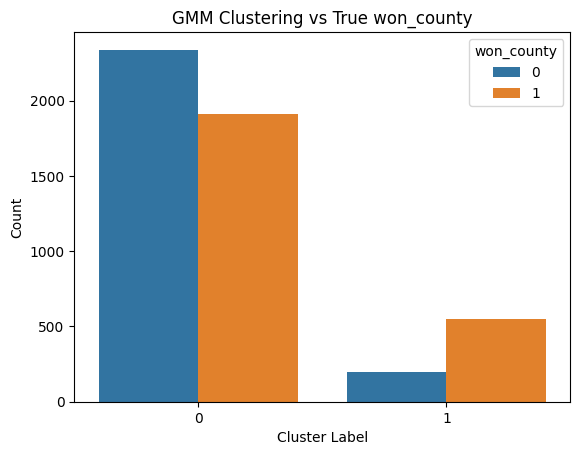

In [21]:
# GMM Clustering
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_sample)

# Silhouette Score
score = silhouette_score(X_sample, gmm_labels)
print(f"Silhouette Score for GMM: {score:.3f}")

# Plot (clusters vs true target)
sns.countplot(x=gmm_labels, hue=y_sample)
plt.title('GMM Clustering vs True won_county')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

Silhouette Score for Agglomerative Clustering: 0.465


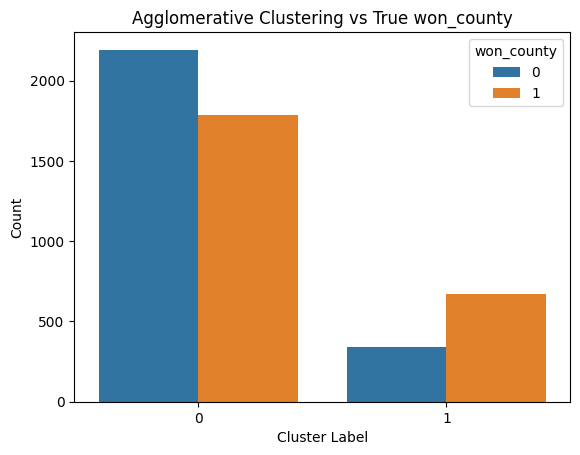

In [22]:
# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(X_sample)

# Silhouette Score
score = silhouette_score(X_sample, agg_labels)
print(f"Silhouette Score for Agglomerative Clustering: {score:.3f}")

# Plot (clusters vs true target)
sns.countplot(x=agg_labels, hue=y_sample)
plt.title('Agglomerative Clustering vs True won_county')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score for Spectral Clustering: 0.041


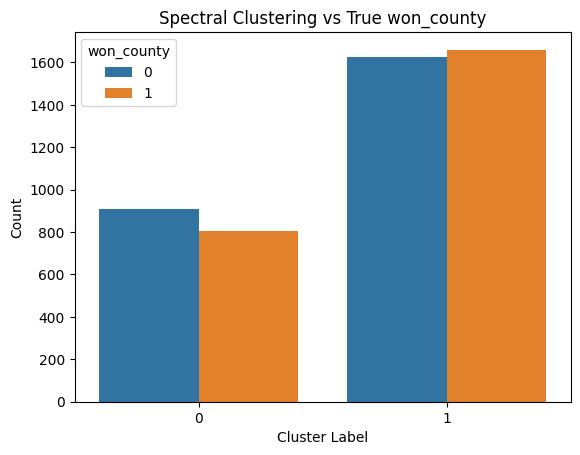

In [23]:
# Spectral clustering
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
spectral_labels = sc.fit_predict(X_sample)

# Silhouette Score
score = silhouette_score(X_sample, spectral_labels)
print(f"Silhouette Score for Spectral Clustering: {score:.3f}")

# Plot (clusters vs true target)
sns.countplot(x=spectral_labels, hue=y_sample)
plt.title('Spectral Clustering vs True won_county')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()